# Combined Cycle Power Plant Analysis
In Combined Cycle Power Plant analysis with the given dataset we have sensor data for Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) of the power plant which produces the net hourly electrical energy output (EP) of the plant. Use Data Science Techniques to find out patterns from the available data to check which features impact the label most.

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is collected from and has the effect on the Steam Turbine, the other three of the ambient variables affect the GT performance.

The Dataset is taken from here – [Combined Cycle Dataset](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant)

# 1. Importing the Library

In [1]:
#Importing the necessary packages to process or plot the data
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading the Dataset

In [2]:
#Getting the data
data = pd.read_csv("0000000000002419_training_ccpp_x_y_train.csv", delimiter=",")

In [3]:
#Print the head of the Dataframe
data.head()

,# T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38


In [4]:
'''As we know the EP(Electrical energy output) is our target value, so we are going to save it'''
y_train=data[' EP']
del data[' EP']

In [5]:
#Print the y_train
y_train

0       482.26
1       446.94
2       452.56
3       433.44
4       480.38
         ...  
7171    477.91
7172    476.87
7173    437.65
7174    459.97
7175    444.42
Name:  EP, Length: 7176, dtype: float64

# 3. Structure of the Dataset

In [6]:
#Print the Describe function for the Dataframe
data.describe()

,# T,V,AP,RH
count,7176.000000,7176.000000,7176.000000,7176.000000
mean,19.629712,54.288154,1013.263032,73.275818
std,7.475256,12.751468,5.964863,14.625093
min,1.810000,25.360000,992.890000,25.560000
25%,13.470000,41.740000,1009.010000,63.202500
50%,20.315000,52.050000,1012.910000,74.895000
75%,25.720000,66.540000,1017.302500,84.925000
max,35.770000,81.560000,1033.300000,100.160000


In [7]:
#Print the shape of the Dataframe
data.shape

(7176, 4)

In [8]:
#Print the shape of the y_train
y_train.shape

(7176,)

## Missing or Null Points

In [9]:
data.isnull().sum()

# T    0
 V     0
 AP    0
 RH    0
dtype: int64

In [10]:
data.isna().sum()

# T    0
 V     0
 AP    0
 RH    0
dtype: int64

However, there are no missing values in this dataset as shown above. So we will proceed further

# 4. Exploration of the Dataset

## Statistics
For our very first coding implementation, we will calculate descriptive statistics about the Combined Cycle Power Plant. Since numpy has already been imported for us, using this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, we will need to implement the following:

 * Calculate the minimum, maximum, mean, median, and standard deviation of 'EP'. Store each calculation in their respective variable.
 * Store each calculation in their respective variable.

In [11]:
# TODO: Minimum EP of the data
minimum_EP= np.min(y_train)
# Alternative using pandas
# minimum_EP = y_train.min()

# TODO: Maximum EP of the data
maximum_EP = np.max(y_train)
# Alternative using pandas
# maximum_EP = y_train.max()

# TODO: Mean EP of the data
mean_EP = np.mean(y_train)
# Alternative using pandas
# mean_EP = y_train.mean()

# TODO: Median EP of the data
median_EP = np.median(y_train)
# Alternative using pandas
# median_EP = y_train.median()

# TODO: Standard deviation of EP of the data
std_EP = np.std(y_train)
# Alternative using pandas 
# std_EP = y_train.std(ddof=0)

# There are other statistics you can calculate too like quartiles
first_quartile = np.percentile(y_train, 25)
third_quartile = np.percentile(y_train, 75)
inter_quartile = third_quartile - first_quartile

# Show the calculated statistics
print("Statistics for Combined Cycle Power Plant dataset:\n")
print("Minimum EP: ",minimum_EP)
print("Maximum EP: ",maximum_EP)
print("Mean EP: ",mean_EP)
print("Median EP: ",median_EP)
print("Standard deviation of EP: ",std_EP)
print("First quartile of EP: ",first_quartile)
print("Second quartile of EP: ",third_quartile)
print("Interquartile (IQR) of EP: ",inter_quartile)

Statistics for Combined Cycle Power Plant dataset:

Minimum EP:  420.26
Maximum EP:  495.76
Mean EP:  454.43129319955347
Median EP:  451.74
Standard deviation of EP:  17.13337725345268
First quartile of EP:  439.7375
Second quartile of EP:  468.6675
Interquartile (IQR) of EP:  28.930000000000007


Let's analyse the EP in Graphical format

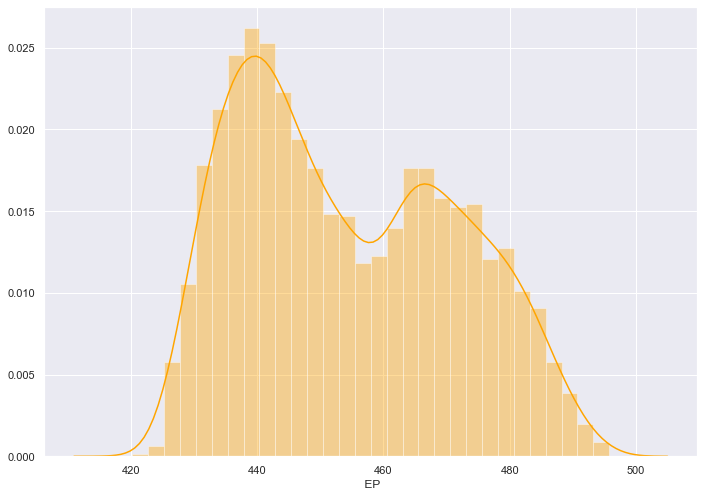

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(y_train, bins=30,color='orange')
plt.show()

From above analysis it can be seen that there is no such outliers are present in the target value.

## Heat Map

In [13]:
'''In this we will examine the correlations in the Dataframe''';

In [14]:
#Here we will create new dataframe with EP for correlation
correlation_df=data.copy()
correlation_df['EP']=y_train
correlation_df.head()

,# T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38


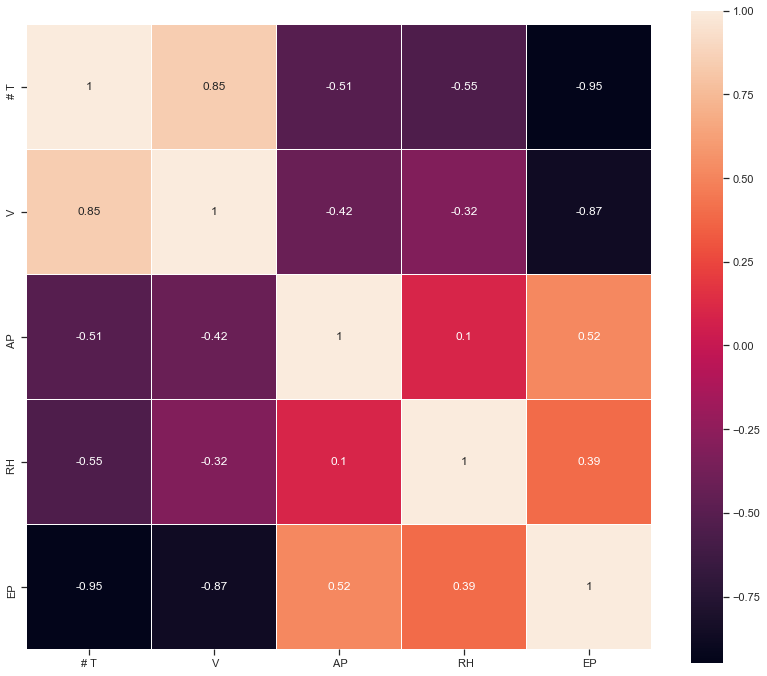

In [15]:
#Using the seaborn library for the heat map
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_df.astype(float).corr(), linewidths=0.1, square=True, linecolor='white', annot=True)
plt.show()

A heat map uses a warm-to-cool color spectrum to show dataset analytics, namely which parts of data receive the most attention.

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

**Is there any correlations among the features?**

 * T has a negative correlation of -0.95 with EP, which is very much close to -1. Thus T may have an inverse relation with EP. Thus the value of EP may decrease linearly with increase in the value of T, which supports previous analysis.

 * V has a negative correlation of -0.87 with EP, which is close to -1. Thus V may also have an inverse relation with EP. Thus the value of EP may also decrease linearly with an increase in V.

 * AP has a correlation of 0.52, this indicates that there may be an increase in the value of EP with an increase in AP.

 * RH has a correlation of 0.39, this indicates that there may be a slight increase in the value of EP with an increase in AP.


## Features Plot

In [16]:
#Print all features in the Dataframe
data.columns

Index(['# T', ' V', ' AP', ' RH'], dtype='object')

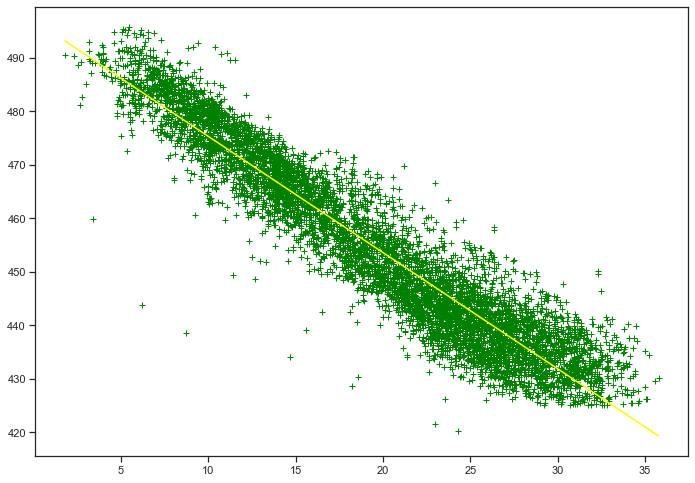

In [17]:
plt.plot(correlation_df["# T"],correlation_df["EP"], '+',color='green')
plt.plot(np.unique(correlation_df["# T"]), np.poly1d(np.polyfit(correlation_df["# T"], correlation_df["EP"], 1))(np.unique(correlation_df["# T"])),color='yellow')
plt.show()

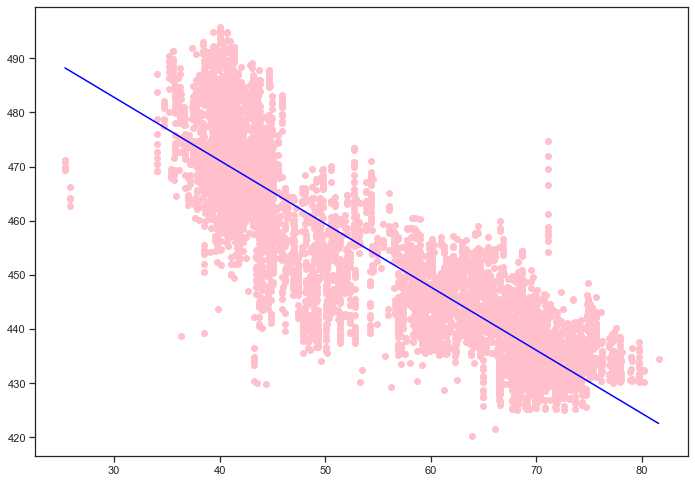

In [18]:
plt.plot(correlation_df[" V"],correlation_df["EP"], 'o',color='pink')
plt.plot(np.unique(correlation_df[" V"]), np.poly1d(np.polyfit(correlation_df[" V"], correlation_df["EP"], 1))(np.unique(correlation_df[" V"])),color='blue')
plt.show()

By analyzing the above graphs we get to understand that T and V may have inverse proportionality with EP,i.e as their values increases there may be a decrease in the energy EP released from the combined cycle power plant.

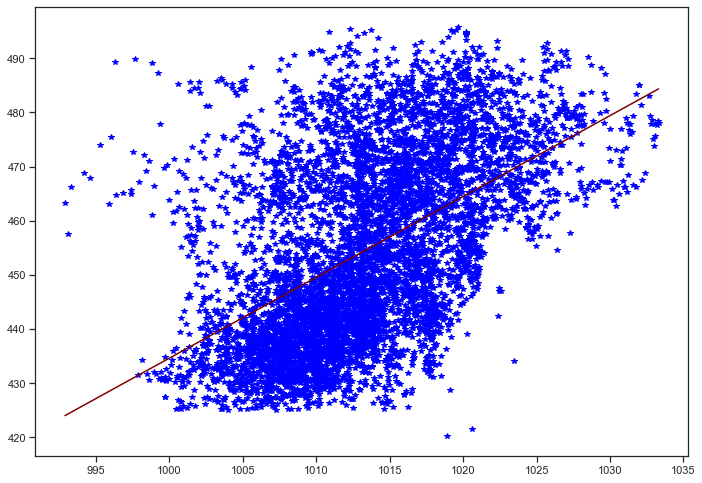

In [19]:
plt.plot(correlation_df[" AP"],correlation_df["EP"], '*',color='blue')
plt.plot(np.unique(correlation_df[" AP"]), np.poly1d(np.polyfit(correlation_df[" AP"], correlation_df["EP"], 1))(np.unique(correlation_df[" AP"])),color='maroon')
plt.show()

The ambient pressure has somewhat linear distribution plot which infers that there may be a slight increase in EP with an increase in AP

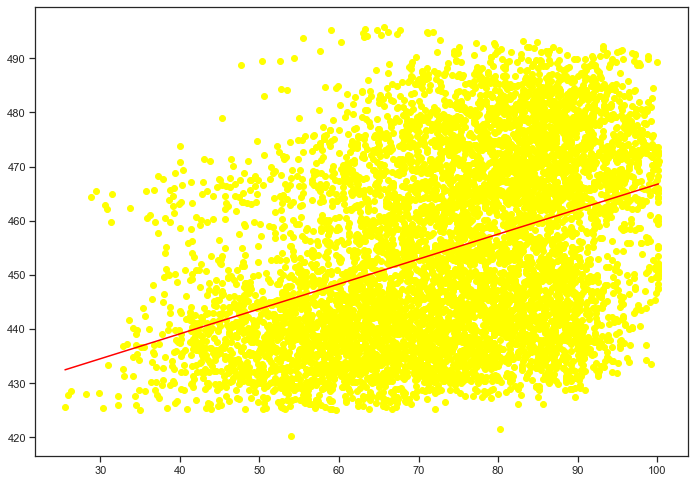

In [20]:
plt.plot(correlation_df[" RH"],correlation_df["EP"], 'o',color='yellow')
plt.plot(np.unique(correlation_df[" RH"]), np.poly1d(np.polyfit(correlation_df[" RH"], correlation_df["EP"], 1))(np.unique(correlation_df[" RH"])),color='red')
plt.show()

Relative humidity RH also has similar graph compared to AP vs EP but is somewhat more uniform which implies EP may have less effect due to RH, that to there may be an increase in EP with increase in RH.

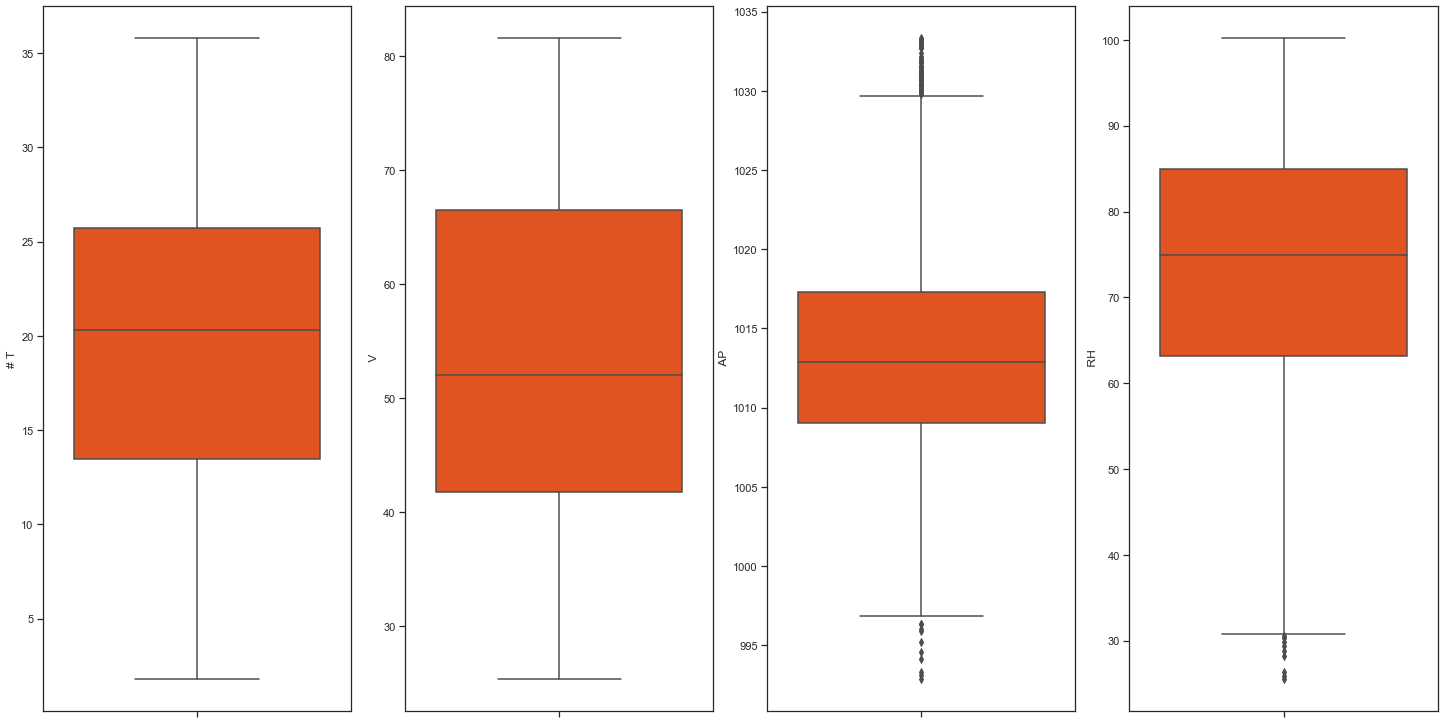

In [21]:
#Using Seaborn for Better Understanding of the Filter_data Features
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index],color='orangered')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

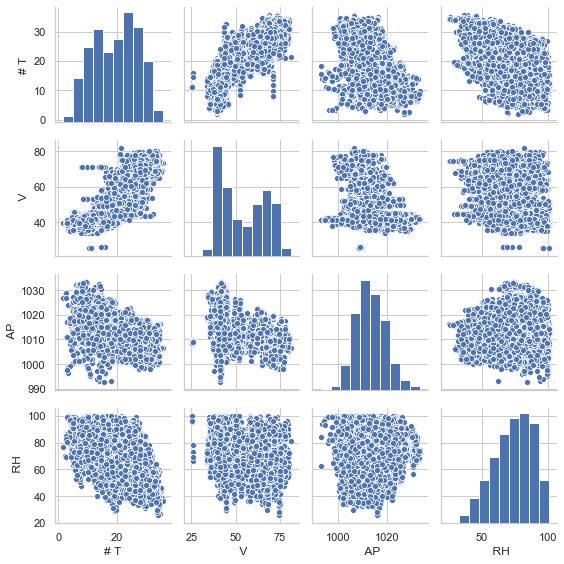

In [22]:
#Printing the graphical representation
sns.set(style='whitegrid', context='notebook')
features_plot = data.columns

sns.pairplot(data[features_plot], height=2.0);
plt.tight_layout()
plt.show()

**Features Observation Outcomes**

 * As we can see that the range of value in AP is more different that the value in other features.

 * So, in order to bring the features value in same range, we can use Feature Scaling Method

In [23]:
#Feature Scaling
scaler=preprocessing.StandardScaler()
scaler.fit(data)
scaler.transform(data)

array([[-1.47827466e+00, -1.24764165e+00,  1.30221067e+00,
         7.58624590e-01],
       [ 2.89012041e-01,  3.06797549e-01,  6.61749044e-01,
        -4.46921842e-01],
       [-3.99975582e-01, -4.21012529e-01, -2.87207194e-01,
         3.75010552e-01],
       ...,
       [ 1.36062192e+00,  1.18048335e+00, -6.54382840e-01,
        -5.83682640e-01],
       [-4.36097263e-01,  9.29089763e-04,  7.84140927e-01,
        -6.59584883e-01],
       [ 1.40209496e+00,  6.07960340e-01, -4.31394890e-01,
        -1.73110573e+00]])

# 5 .Gradient Descent Implementation

In [24]:
# y = mx + b
# m is slope, b is y-intercept
'''Here we will compute the error for given points in the training dataset'''
def compute_error_for_line_given_points(b, m, points):
    #take totalError inital as zero
    totalError = 0
    #Iterate till len of points
    for i in range(0, len(points)):
        #Include x as 0th index of iterator
        #Include y as 1th index of iterator
        x = points[i, 0]
        y = points[i, 1]
        #Compute total error and add the new total error
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [25]:
'''Here we will compute the step_gradient '''
def step_gradient(b_current, m_current, points, learningRate):
    #Intialise two variable one for b and other for m as zero
    #Take variable as length of points
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        #Include x as 0th index of iterator
        #Include y as 1th index of iterator
        x = points[i, 0]
        y = points[i, 1]
        #Update the new b and new m at every iteration by adding value as per formula given
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    #Update new b and new m at last by subtracting the learningRate*new b for b and similarly for m
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [26]:
'''Here we will implement the gradient_descent_runner function'''
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    #Save the starting_b and starting_m in some new variable
    b = starting_b
    m = starting_m
    #Iterate over the num_iterations 
    for i in range(num_iterations):
        '''Call step_gradient on new_b and new_m'''
        b, m = step_gradient(b, m, np.array(points), learning_rate)
    return [b, m]

In [27]:
'''Here we will implement the run function, which is going to call above functions'''
def run():
    #save the training data in some variable,i.e points
    points = np.genfromtxt("0000000000002419_training_ccpp_x_y_train.csv", delimiter=",")
    #Intialise the learning_Rate,initial_b,initial_m and num_iterations
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    #Print the Starting b,Starting m and Starting Cost
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    #Print the New_b, New_m and New_Cost
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

In [28]:
'''Call the Run Function'''
ans=run()
ans

Starting gradient descent at b = 0, m = 0, error = 3109.780886190089
Running...
After 1000 iterations b = 0.7610262363991718, m = 2.564465126927678, error = 126.9327514867774


# 6. Inbuilt Gradient Boosting Regressor

In [29]:
#Getting the x_train
x_train=data

In [30]:
#Shape of x_train
x_train.shape,y_train.shape

((7176, 4), (7176,))

**Importing the library for Regression**

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
alg=GradientBoostingRegressor(learning_rate=1.9,n_estimators=2000)
alg

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.9, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

**Training**

In [33]:
#Training the data
alg.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.9, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

**Prediction**

In [34]:
#Getting the test data
x_test=np.genfromtxt("0000000000002419_test_ccpp_x_test.csv",delimiter=",")
y_train.ravel(order='A')
#Prediction
y_predic=alg.predict(x_test)

In [35]:
#Print the y_predic
y_predic

array([472.48543507, 461.71928633, 434.22314744, ..., 443.59570999,
       457.24078238, 443.65087566])

**Model Evaluation**

In [36]:
#Get the R2 score for the model
'''Using inbuilt score function in the regression model'''
alg.score(x_train,y_train)

0.998540993407853

**Saving the Prediction**

In [37]:
np.savetxt("Predict.csv",y_predic,fmt="%.5f")

# 7. Conclusion

 * By analyzing the given data, we can say that EP is increasing with T and V. While EP is decreasing with the increment of AP.

 * So, in order to increase energy production of power plant(EP), we need to operate the combined cycle power plant at low AT, low V, high RH, and high AP.

 * During Implementation we have seen that by changing the Learning rate, our slope and intercepts get changed.